In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import re
import seaborn as sns

In [2]:
data_dtm = pd.read_pickle("../data/preprocessed/data_dtm.pkl")

In [3]:
data_clean = pd.read_csv("../data/preprocessed/corpus.csv")
data_clean.drop("title", axis=1, inplace=True)
data_clean

,category,body
0,ARTS & CULTURE,in october carolyn kramer received disturbing ...
1,ARTS & CULTURE,this week talked with actor jeff hiller about ...
2,ARTS & CULTURE,the new yorker is taking on president donald t...
3,ARTS & CULTURE,kellen hickey yearold who lives in hudson wisc...
4,ARTS & CULTURE,theres something about combining the tradition...
...,...,...
6872,WOMEN,still think about that tuesday night dinner w...
6873,WOMEN,remember the morning of my high school gradua...
6874,WOMEN,my husband gene doesnt wear pajamas asked him ...
6875,WOMEN,by antonioguillem via thinkstockby lisa odonog...


In [4]:
data_dtm = data_dtm.transpose()

In [5]:
len(data_clean.category.unique())

14

In [6]:
data_dtm

category,ARTS & CULTURE,ARTS & CULTURE,ARTS & CULTURE,ARTS & CULTURE,ARTS & CULTURE,ARTS & CULTURE,ARTS & CULTURE,ARTS & CULTURE,ARTS & CULTURE,ARTS & CULTURE,...,WOMEN,WOMEN,WOMEN,WOMEN,WOMEN,WOMEN,WOMEN,WOMEN,WOMEN,WOMEN
aa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aabaco,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aabacos,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aace,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
aachen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zwirner,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zwlfer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zych,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zygmunt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
def filter_top_50_words(df):
    top_dict = {}
    for c in set(df.columns):
        top = df[c].sum(axis=1).sort_values(ascending=False).head(50)
        top_dict[c] = list(zip(top.index, top.values))
    return top_dict

In [8]:
top_dict = filter_top_50_words(data_dtm)

In [9]:
for category, top_words in top_dict.items():
    print(category)
    print(" ".join([top_word[0] for top_word in top_words][:20]))
    print("-"*20)

ENTERTAINMENT
said like just people new time know think dont im told really season thats film going years did movie way
--------------------
RELIGION
people said god religious church like just jesus faith white trump world time new muslim american christian life muslims women
--------------------
ARTS & CULTURE
art like new work people just time said world years women artists way life book think artist make music dont
--------------------
SPORTS
said team game just players athletes sports time olympic nfl games told years like usa new nassar people olympics world
--------------------
ENVIRONMENT
said climate new energy change water people like year years just world oil time environmental state according animal oo animals
--------------------
TECH
said facebook new people company like apple data google users time just use technology companies information percent make internet year
--------------------
POLITICS
said trump president people state new house campaign told trumps year white d

In [10]:
from collections import Counter

In [11]:
words = []
for category in set(data_dtm.columns):
    top_words = [word[0] for word in top_dict[category]]
    for w in top_words:
        words.append(w)

In [12]:
most_common_words = Counter(words).most_common()
similar_words = []
for common in most_common_words:
    if common[1] > 2:
        similar_words.append(common[0])

In [13]:
similar_words = similar_words[:25]
similar_words

['said',
 'like',
 'just',
 'people',
 'new',
 'time',
 'dont',
 'years',
 'know',
 'make',
 'year',
 'told',
 'way',
 'work',
 'think',
 'did',
 'world',
 'according',
 'want',
 'say',
 'day',
 'im',
 'thats',
 'trump',
 'life']

In [14]:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

stop_words = text.ENGLISH_STOP_WORDS.union(similar_words)

def convert_to_data_dtm(stop_words, data_clean):
    cv = CountVectorizer(stop_words=stop_words, max_features=10000)
    data_cv = cv.fit_transform(data_clean['body'].values.astype("U"))
    data_dtm = pd.DataFrame(data_cv.toarray(), columns = cv.get_feature_names())
    data_dtm.index = data_clean.category
    return data_cv, data_dtm

In [15]:
data_cv, data_dtm = convert_to_data_dtm(stop_words, data_clean)

In [16]:
data_dtm.to_pickle("../data/preprocessed/stop_words_dtm.pkl")

In [21]:
from wordcloud import WordCloud

def generate_word_cloud(stop_words, data_dtm):
    wc = WordCloud(
        stopwords=stop_words, 
        background_color='white', 
        width=900,
        height=800,
        colormap="Dark2", 
        random_state=42
        )
    figure = plt.figure(figsize=(12,20))
    for idx, category in enumerate(set(data_dtm.transpose().columns)):
        words = data_dtm.transpose()[category].sum(axis=1)
        cloud = wc.generate_from_frequencies(words.to_dict())
        plt.subplot(5,3,idx+1)
        plt.imshow(cloud, interpolation='bilinear')
        plt.title(category)
        plt.axis("off")
    plt.show()

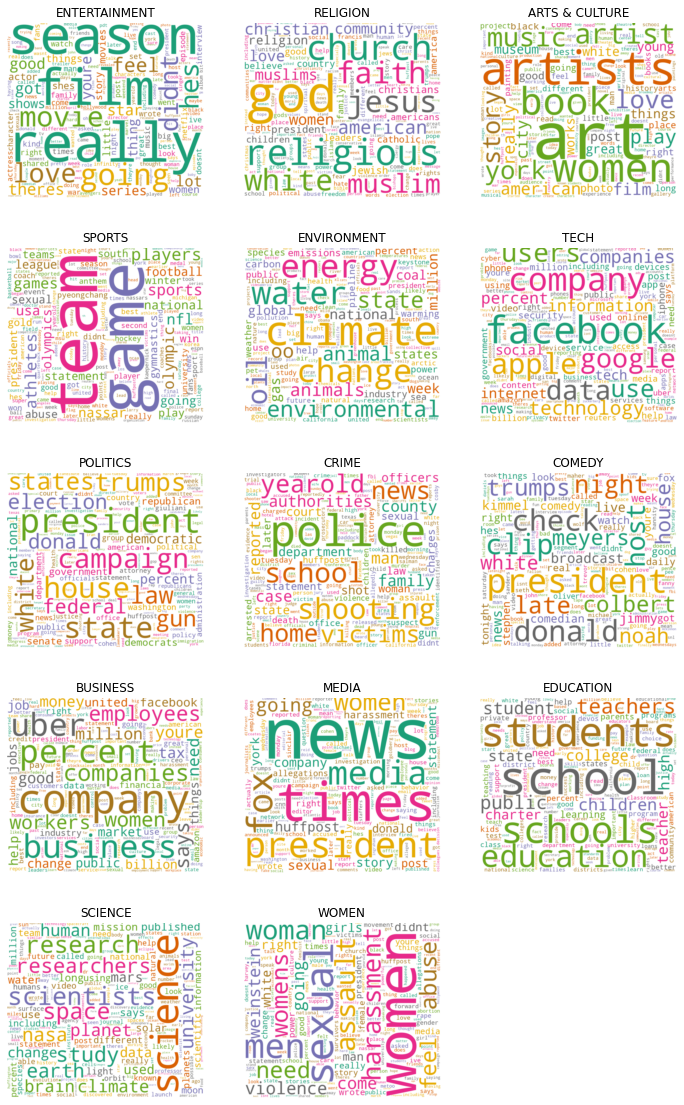

In [22]:
generate_word_cloud(stop_words, data_dtm)

### Findings
1. From the wordcloud it is clear that our data is indded giving everything related to their categories.
2. Here we can see economy, ecomonic are two words which can be converted to one for best results since they both means same for our model
3. Some nouns like Country name are distincting categories, which shouldn't be the case, so we need to remove that

In [75]:
!pip install country-list

In [76]:
import country_list
countries = dict(country_list.countries_for_language('en'))
countries = [country.lower() for country in list(countries.values())]
countries.append("england")
countries.append("wales")

In [77]:
stop_words = stop_words.union(countries)

In [78]:
data_cv, data_dtm = convert_to_data_dtm(stop_words, data_clean)

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['africa', 'african', 'american', 'antigua', 'arab', 'arabia', 'barbuda', 'barthélemy', 'bissau', 'bosnia', 'bouvet', 'brazzaville', 'british', 'burkina', 'burma', 'caicos', 'caledonia', 'cape', 'caribbean', 'cayman', 'central', 'christmas', 'city', 'cocos', 'congo', 'cook', 'costa', 'côte', 'dominican', 'el', 'emirates', 'equatorial', 'falkland', 'faroe', 'faso', 'french', 'futuna', 'grenadines', 'guiana', 'heard', 'helena', 'herzegovina', 'hong', 'indian', 'island', 'islands', 'isle', 'ivoire', 'jan', 'keeling', 'kingdom', 'kinshasa', 'kitts', 'kong', 'korea', 'lanka', 'leone', 'leste', 'lucia', 'maarten', 'macao', 'macedonia', 'man', 'mariana', 'marino', 'marshall', 'martin', 'mayen', 'mcdonald', 'miquelon', 'myanmar', 'nevis', 'norfolk', 'north', 'northern', 'ocean', 'outlying'

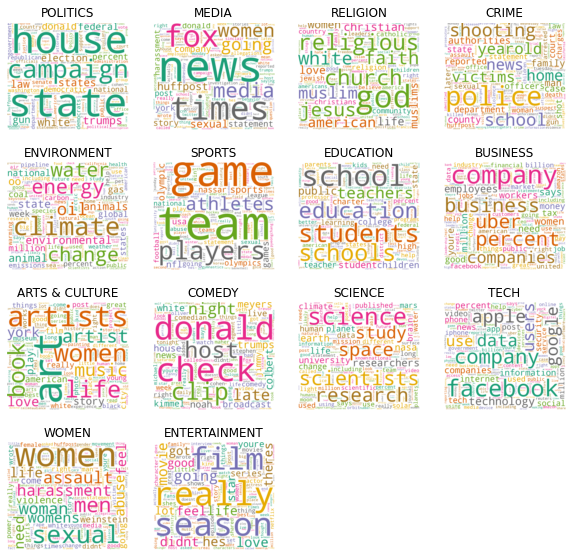

In [79]:
generate_word_cloud(stop_words, data_dtm)

### Stemming

In [80]:
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Bimal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Bimal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Bimal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
def stem_sentence(sentence):
    words = word_tokenize(sentence)
    stemmed_words = []
    stemmer = SnowballStemmer(language="english", ignore_stopwords=True)
    for word in words:
        stemmed_words.append(stemmer.stem(word))
    return " ".join(stemmed_words)

In [82]:
# data_clean.body = data_clean.body.apply(stemm)
def lemmatize_sentence(sentence):
    words = word_tokenize(sentence)
    lematized_words = []
    lematizer = WordNetLemmatizer()
    for word in words:
        lematized_words.append(lematizer.lemmatize(word))
    return " ".join(lematized_words)

In [83]:
data_clean_stem = data_clean.copy()
data_clean_lemm = data_clean.copy()

In [85]:
# data_clean_stem.body = data_clean_stem.body.apply(stem_sentence)
# data_cv_stem, data_dtm_stem = convert_to_data_dtm(stop_words, data_clean_stem)
# generate_word_cloud(stop_words, data_dtm_stem)

In [86]:
# data_clean_lemm.body = data_clean_lemm.body.apply(lemmatize_sentence)
# data_cv_lemm, data_dtm_lemm = convert_to_data_dtm(stop_words, data_clean_lemm)
# generate_word_cloud(stop_words, data_dtm_lemm)

In [87]:
data_dtm

,aapi,aaron,abandon,abandoned,abbott,abc,abcs,abilities,ability,able,...,zimmerman,zinke,zoe,zombie,zone,zones,zoo,zoos,zuckerberg,zuckerbergs
category,,,,,,,,,,,,,,,,,,,,,
ARTS & CULTURE,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
ARTS & CULTURE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARTS & CULTURE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ARTS & CULTURE,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
ARTS & CULTURE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WOMEN,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
WOMEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WOMEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
sum_df = pd.DataFrame()
for category in set(data_dtm.transpose()):
    sum_dtm = data_dtm.transpose()[category].sum(axis=1)
    sum_df[category] = sum_dtm

sum_df

,ENTERTAINMENT,RELIGION,ARTS & CULTURE,SPORTS,ENVIRONMENT,TECH,POLITICS,CRIME,COMEDY,BUSINESS,MEDIA,EDUCATION,SCIENCE,WOMEN
aapi,1,0,5,0,0,0,0,0,0,22,0,0,0,0
aaron,2,1,11,11,3,1,5,1,1,1,3,17,2,2
abandon,0,8,12,2,9,4,5,1,0,4,2,5,1,6
abandoned,0,9,29,1,13,1,11,5,0,5,1,7,1,6
abbott,2,3,2,3,1,0,21,10,0,2,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zones,0,1,5,1,7,1,4,2,0,1,3,3,3,0
zoo,1,0,3,0,54,1,0,0,1,1,0,2,27,3
zoos,0,0,1,0,21,0,0,0,0,0,0,2,11,0
zuckerberg,7,0,0,0,0,106,4,0,5,60,9,5,0,0


In [24]:
total_words = {
    category : [] for category in data_clean['category'].unique()
}

unique_words = total_words.copy()

drop_zero = lambda column: None if column == 0 else column

In [25]:
for category in total_words.keys():
    total_words[category] = list(sum_df[category].apply(drop_zero).dropna().astype("int").index)

In [26]:
for category in total_words.keys():
    for word in total_words[category]:
        categories = list(total_words.keys())
        categories.remove(category)
        for cat in categories:
            if word not in total_words[cat]:
                unique_words[category].append(word)

In [30]:
total_words = {category: len(total_words[category]) for category in total_words.keys()}
total_words

{'ARTS & CULTURE': 9518,
 'BUSINESS': 8642,
 'COMEDY': 4929,
 'CRIME': 6573,
 'EDUCATION': 8731,
 'ENTERTAINMENT': 7450,
 'ENVIRONMENT': 7911,
 'MEDIA': 7225,
 'POLITICS': 8353,
 'RELIGION': 8517,
 'SCIENCE': 7152,
 'SPORTS': 7569,
 'TECH': 7966,
 'WOMEN': 8561}

In [31]:
unique_words = {category: len(set(unique_words[category])) for category in unique_words.keys()}

In [32]:
unique_words

{'ARTS & CULTURE': 7066,
 'BUSINESS': 6190,
 'COMEDY': 2477,
 'CRIME': 4121,
 'EDUCATION': 6279,
 'ENTERTAINMENT': 4998,
 'ENVIRONMENT': 5459,
 'MEDIA': 4773,
 'POLITICS': 5901,
 'RELIGION': 6065,
 'SCIENCE': 4700,
 'SPORTS': 5117,
 'TECH': 5514,
 'WOMEN': 6109}

In [68]:
data = {
    'categories': list(total_words.keys()) + list(unique_words.keys()),
    'values' : list(total_words.values()) + list(unique_words.values()),
    'group': ["Total Words" for _ in range(len(list(unique_words.keys())))] + ["Unique Words" for _ in range(len(list(unique_words.keys())))]
}

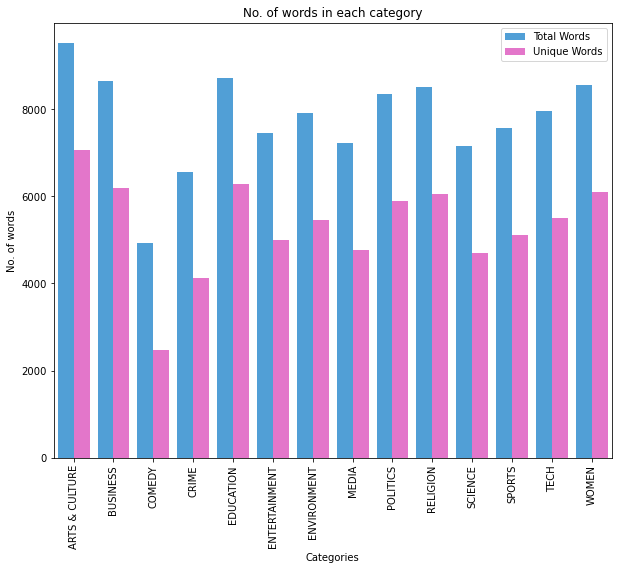

In [69]:
fig = plt.figure(figsize=(10,8))
bplot = sns.barplot(
    x='categories', 
    y='values', 
    hue='group',
    data=data, 
    palette=['#3ba3ec', '#f564d4']
    )
bplot.set_title("No. of words in each category")
bplot.set_xlabel("Categories")
bplot.set_ylabel("No. of words")
for item in bplot.get_xticklabels():
    item.set_rotation(90)
plt.show()


In [100]:
pickle.dump(data_dtm,open("../data/preprocessed/final_data_dtm.pkl", "wb"))